# UIDAI Data Hackathon - ENROLMENT DATASET

In [27]:
import zipfile
import os
import pandas as pd

zip_path = r"C:/Users/agast/Downloads/api_data_aadhar_enrolment.zip"
extract_path = r"C:/Users/agast/Downloads/api_data_aadhar_enrolment"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [28]:
csv_files = []

for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

print("CSV files found:", csv_files)


CSV files found: ['C:/Users/agast/Downloads/api_data_aadhar_enrolment\\api_data_aadhar_enrolment\\api_data_aadhar_enrolment_0_500000.csv', 'C:/Users/agast/Downloads/api_data_aadhar_enrolment\\api_data_aadhar_enrolment\\api_data_aadhar_enrolment_1000000_1006029.csv', 'C:/Users/agast/Downloads/api_data_aadhar_enrolment\\api_data_aadhar_enrolment\\api_data_aadhar_enrolment_500000_1000000.csv']


In [29]:
enrol_dfs = [pd.read_csv(f) for f in csv_files]

for i, df in enumerate(enrol_dfs):
    print(f"File {i+1} shape:", df.shape)

enrolment = pd.concat(enrol_dfs, ignore_index=True)

print("Combined shape:", enrolment.shape)
enrolment.head()


File 1 shape: (500000, 7)
File 2 shape: (6029, 7)
File 3 shape: (500000, 7)
Combined shape: (1006029, 7)


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [30]:
enrolment.columns


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [31]:
enrolment['date'] = pd.to_datetime(
    enrolment['date'],
    dayfirst=True,
    errors='coerce'
)

print("Invalid dates:", enrolment['date'].isna().sum())

Invalid dates: 0


In [32]:
age_cols = ['age_0_5','age_5_17','age_18_greater']

enrolment[age_cols] = enrolment[age_cols].fillna(0)

for col in age_cols:
    enrolment[col] = enrolment[col].clip(lower=0)

enrolment[age_cols].describe()

,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06
mean,3.525709e+00,1.710074e+00,1.673441e-01
std,1.753851e+01,1.436963e+01,3.220525e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,1.000000e+00,0.000000e+00
max,2.688000e+03,1.812000e+03,8.550000e+02


In [33]:
import re

def normalize_text(x):
    if pd.isna(x):
        return ""
    x = x.lower()
    x = re.sub(r'[^a-z\s]', '', x)
    x = re.sub(r'\s+', '', x)
    return x

enrolment['state_base'] = enrolment['state'].apply(normalize_text)
enrolment['district_base'] = enrolment['district'].apply(normalize_text)

enrolment[['state','state_base']].head(10)


,state,state_base
0,Meghalaya,meghalaya
1,Karnataka,karnataka
2,Uttar Pradesh,uttarpradesh
3,Uttar Pradesh,uttarpradesh
4,Karnataka,karnataka
5,Bihar,bihar
6,Bihar,bihar
7,Uttar Pradesh,uttarpradesh
8,Uttar Pradesh,uttarpradesh
9,Bihar,bihar


In [34]:
canonical_states = {
    "andhrapradesh": "andhra pradesh",
    "arunachalpradesh": "arunachal pradesh",
    "assam": "assam",
    "bihar": "bihar",
    "chhattisgarh": "chhattisgarh",
    "goa": "goa",
    "gujarat": "gujarat",
    "haryana": "haryana",
    "himachalpradesh": "himachal pradesh",
    "jharkhand": "jharkhand",
    "karnataka": "karnataka",
    "kerala": "kerala",
    "madhyapradesh": "madhya pradesh",
    "maharashtra": "maharashtra",
    "manipur": "manipur",
    "meghalaya": "meghalaya",
    "mizoram": "mizoram",
    "nagaland": "nagaland",
    "odisha": "odisha",
    "punjab": "punjab",
    "rajasthan": "rajasthan",
    "sikkim": "sikkim",
    "tamilnadu": "tamil nadu",
    "telangana": "telangana",
    "tripura": "tripura",
    "uttarpradesh": "uttar pradesh",
    "uttarakhand": "uttarakhand",
    "westbengal": "west bengal",
    "andamannicobarislands": "andaman and nicobar islands",
    "chandigarh": "chandigarh",
    "dadraandnagarhavelianddamandiu": "dadra and nagar haveli and daman and diu",
    "delhi": "delhi",
    "jammuandkashmir": "jammu and kashmir",
    "ladakh": "ladakh",
    "lakshadweep": "lakshadweep",
    "puducherry": "puducherry"
}


In [35]:
enrolment['state_final'] = enrolment['state_base'].map(canonical_states)
enrolment['state_final'] = enrolment['state_final'].fillna("unknown")

print("Unique states:", enrolment['state_final'].nunique())
enrolment['state_final'].value_counts().head(10)


Unique states: 36


state_final
uttar pradesh     110369
tamil nadu         92552
maharashtra        77191
west bengal        76552
karnataka          70198
andhra pradesh     65663
bihar              60567
rajasthan          56159
madhya pradesh     50225
gujarat            46624
Name: count, dtype: int64

In [36]:
legacy_state_map = {
    "orissa": "odisha",
    "uttaranchal": "uttarakhand",
    "damandiu": "dadra and nagar haveli and daman and diu",
    "dadranagarhaveli": "dadra and nagar haveli and daman and diu"
}

enrolment['state_final'] = enrolment['state_base'].replace(legacy_state_map)


In [37]:
enrolment['state_final'].value_counts()


state_final
uttarpradesh                                110369
tamilnadu                                    92552
maharashtra                                  77191
westbengal                                   76552
karnataka                                    70198
andhrapradesh                                65663
bihar                                        60567
rajasthan                                    56159
madhyapradesh                                50225
odisha                                       47011
gujarat                                      46624
telangana                                    42774
kerala                                       39145
assam                                        31827
jharkhand                                    23218
punjab                                       20439
chhattisgarh                                 18550
haryana                                      15997
jammuandkashmir                              11316
himachalpradesh    

In [38]:
# Create district_final (basic standardization)
enrolment['district_final'] = (
    enrolment['district']
    .astype(str)
    .str.lower()
    .str.strip()
)


In [39]:
enrolment[['district', 'district_final']].head()


,district,district_final
0,East Khasi Hills,east khasi hills
1,Bengaluru Urban,bengaluru urban
2,Kanpur Nagar,kanpur nagar
3,Aligarh,aligarh
4,Bengaluru Urban,bengaluru urban


In [40]:
before = enrolment.shape[0]

enrolment = enrolment[
    (enrolment['state_final'] != 'unknown') &
    (enrolment['district_final'].notna())
]

after = enrolment.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Dropped % :", round((before-after)/before*100, 2))


Rows before: 1006029
Rows after : 1006029
Dropped % : 0.0


In [41]:
state_canonical_map = {
    # Big states
    "uttarpradesh": "uttar pradesh",
    "tamilnadu": "tamil nadu",
    "maharashtra": "maharashtra",
    "westbengal": "west bengal",
    "westbangal": "west bengal",
    "karnataka": "karnataka",
    "andhrapradesh": "andhra pradesh",
    "bihar": "bihar",
    "rajasthan": "rajasthan",
    "madhyapradesh": "madhya pradesh",
    "odisha": "odisha",
    "gujarat": "gujarat",
    "telangana": "telangana",
    "kerala": "kerala",
    "assam": "assam",
    "jharkhand": "jharkhand",
    "punjab": "punjab",
    "chhattisgarh": "chhattisgarh",
    "haryana": "haryana",
    "uttarakhand": "uttarakhand",
    "himachalpradesh": "himachal pradesh",
    "meghalaya": "meghalaya",
    "tripura": "tripura",
    "manipur": "manipur",
    "nagaland": "nagaland",
    "arunachalpradesh": "arunachal pradesh",
    "goa": "goa",
    "mizoram": "mizoram",
    "sikkim": "sikkim",

    # UTs
    "delhi": "delhi",
    "puducherry": "puducherry",
    "pondicherry": "puducherry",
    "chandigarh": "chandigarh",
    "ladakh": "ladakh",
    "lakshadweep": "lakshadweep",
    "jammuandkashmir": "jammu and kashmir",
    "jammukashmir": "jammu and kashmir",
    "andamanandnicobarislands": "andaman and nicobar islands",
    "andamannicobarislands": "andaman and nicobar islands",
    "dadraandnagarhaveli": "dadra and nagar haveli and daman and diu",
    "damananddiu": "dadra and nagar haveli and daman and diu",
    "dadraandnagarhavelianddamananddiu": "dadra and nagar haveli and daman and diu"
}

enrolment['state_final'] = enrolment['state_final'].replace(state_canonical_map)


In [42]:
print("Final unique states:", enrolment['state_final'].nunique())
enrolment['state_final'].value_counts()


Final unique states: 38


state_final
uttar pradesh                               110369
tamil nadu                                   92552
maharashtra                                  77191
west bengal                                  76561
karnataka                                    70198
andhra pradesh                               65663
bihar                                        60567
rajasthan                                    56159
madhya pradesh                               50225
odisha                                       47011
gujarat                                      46624
telangana                                    42774
kerala                                       39145
assam                                        31827
jharkhand                                    23218
punjab                                       20439
chhattisgarh                                 18550
haryana                                      15997
jammu and kashmir                            11455
himachal pradesh   

In [43]:
legacy_state_map = {
    "orissa": "odisha",
    "uttaranchal": "uttarakhand",
    "damandiu": "dadra and nagar haveli and daman and diu",
    "dadranagarhaveli": "dadra and nagar haveli and daman and diu"
}

enrolment['state_final'] = enrolment['state_base'].replace(legacy_state_map)


In [44]:
enrolment['state_final'].value_counts()


state_final
uttarpradesh                                110369
tamilnadu                                    92552
maharashtra                                  77191
westbengal                                   76552
karnataka                                    70198
andhrapradesh                                65663
bihar                                        60567
rajasthan                                    56159
madhyapradesh                                50225
odisha                                       47011
gujarat                                      46624
telangana                                    42774
kerala                                       39145
assam                                        31827
jharkhand                                    23218
punjab                                       20439
chhattisgarh                                 18550
haryana                                      15997
jammuandkashmir                              11316
himachalpradesh    

In [45]:
enrolment['district_final'] = enrolment['district'].str.lower().str.strip()


In [46]:
before = enrolment.shape[0]

enrolment = enrolment[
    (enrolment['state_final'] != 'unknown') &
    (enrolment['district_final'].notna())
]

after = enrolment.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Dropped % :", round((before-after)/before*100, 2))


Rows before: 1006029
Rows after : 1006029
Dropped % : 0.0


In [47]:
print("Final rows:", enrolment.shape[0])
print("States:", enrolment['state_final'].nunique())
print("Districts:", enrolment['district_final'].nunique())
print("Date range:", enrolment['date'].min(), "to", enrolment['date'].max())


Final rows: 1006029
States: 45
Districts: 964
Date range: 2025-03-02 00:00:00 to 2025-12-31 00:00:00


In [49]:
sorted(enrolment['state_final'].unique())


['',
 'andamanandnicobarislands',
 'andamannicobarislands',
 'andhrapradesh',
 'arunachalpradesh',
 'assam',
 'bihar',
 'chandigarh',
 'chhattisgarh',
 'dadra and nagar haveli and daman and diu',
 'dadraandnagarhaveli',
 'dadraandnagarhavelianddamananddiu',
 'damananddiu',
 'delhi',
 'goa',
 'gujarat',
 'haryana',
 'himachalpradesh',
 'jammuandkashmir',
 'jammukashmir',
 'jharkhand',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'madhyapradesh',
 'maharashtra',
 'manipur',
 'meghalaya',
 'mizoram',
 'nagaland',
 'odisha',
 'pondicherry',
 'puducherry',
 'punjab',
 'rajasthan',
 'sikkim',
 'tamilnadu',
 'telangana',
 'thedadraandnagarhavelianddamananddiu',
 'tripura',
 'uttarakhand',
 'uttarpradesh',
 'westbangal',
 'westbengal']

In [50]:
import re

def normalize_state(x):
    if pd.isna(x):
        return "unknown"
    x = x.lower()
    x = re.sub(r'[^a-z]', '', x)   # remove spaces, &, etc.
    return x

enrolment['state_base_clean'] = enrolment['state_final'].apply(normalize_state)


In [51]:
enrolment[['state_final', 'state_base_clean']].head(10)


,state_final,state_base_clean
0,meghalaya,meghalaya
1,karnataka,karnataka
2,uttarpradesh,uttarpradesh
3,uttarpradesh,uttarpradesh
4,karnataka,karnataka
5,bihar,bihar
6,bihar,bihar
7,uttarpradesh,uttarpradesh
8,uttarpradesh,uttarpradesh
9,bihar,bihar


In [52]:
canonical_state_map = {
    "andhrapradesh": "andhra pradesh",
    "arunachalpradesh": "arunachal pradesh",
    "assam": "assam",
    "bihar": "bihar",
    "chhattisgarh": "chhattisgarh",
    "goa": "goa",
    "gujarat": "gujarat",
    "haryana": "haryana",
    "himachalpradesh": "himachal pradesh",
    "jharkhand": "jharkhand",
    "karnataka": "karnataka",
    "kerala": "kerala",
    "madhyapradesh": "madhya pradesh",
    "maharashtra": "maharashtra",
    "manipur": "manipur",
    "meghalaya": "meghalaya",
    "mizoram": "mizoram",
    "nagaland": "nagaland",
    "odisha": "odisha",
    "punjab": "punjab",
    "rajasthan": "rajasthan",
    "sikkim": "sikkim",
    "tamilnadu": "tamil nadu",
    "telangana": "telangana",
    "tripura": "tripura",
    "uttarpradesh": "uttar pradesh",
    "uttarakhand": "uttarakhand",
    "westbengal": "west bengal",
    "andamanandnicobarislands": "andaman and nicobar islands",
    "chandigarh": "chandigarh",
    "dadraandnagarhavelianddamandiu": "dadra and nagar haveli and daman and diu",
    "delhi": "delhi",
    "jammuandkashmir": "jammu and kashmir",
    "ladakh": "ladakh",
    "lakshadweep": "lakshadweep",
    "puducherry": "puducherry"
}


In [53]:
enrolment['state_final'] = enrolment['state_base_clean'].map(canonical_state_map)


In [54]:
before = enrolment.shape[0]

enrolment = enrolment[enrolment['state_final'].notna()]

after = enrolment.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Dropped % :", round((before-after)/before*100, 2))


Rows before: 1006029
Rows after : 1004523
Dropped % : 0.15


In [55]:
print("Final rows:", enrolment.shape[0])
print("States:", enrolment['state_final'].nunique())


Final rows: 1004523
States: 35


In [56]:
import re
import pandas as pd

def normalize_district(x):
    if pd.isna(x):
        return ""
    x = x.lower()
    x = re.sub(r'[^a-z\s]', '', x)   # remove numbers, symbols
    x = re.sub(r'\s+', ' ', x).strip()
    return x

enrolment['district_base'] = enrolment['district'].apply(normalize_district)

enrolment[['district', 'district_base']].head(10)


,district,district_base
0,East Khasi Hills,east khasi hills
1,Bengaluru Urban,bengaluru urban
2,Kanpur Nagar,kanpur nagar
3,Aligarh,aligarh
4,Bengaluru Urban,bengaluru urban
5,Sitamarhi,sitamarhi
6,Sitamarhi,sitamarhi
7,Bahraich,bahraich
8,Firozabad,firozabad
9,Purbi Champaran,purbi champaran


In [57]:
enrolment['district_final'] = enrolment['district_base']


In [58]:
invalid_districts = [
    '', 'na', 'n a', 'unknown', 'not available',
    'others', 'other', 'miscellaneous'
]

enrolment.loc[
    enrolment['district_final'].isin(invalid_districts),
    'district_final'
] = None


In [59]:
from collections import Counter

def canonicalize_districts(df, cutoff=0.92):
    districts = df['district_base'].dropna().unique()
    mapping = {}

    for d in districts:
        if d in mapping:
            continue
        similar = [x for x in districts if similarity(d, x) >= cutoff]
        canonical = sorted(similar, key=len)[0]
        for s in similar:
            mapping[s] = canonical

    return df['district_base'].map(mapping)


In [60]:
def canonicalize_fast(df):
    freq = df['district_base'].value_counts()
    mapping = {}

    for d in freq.index:
        base = d.replace(' district', '').replace(' dist', '')
        mapping[d] = base

    return df['district_base'].map(mapping)


In [61]:
enrolment['district_final'] = (
    enrolment
    .groupby('state_final', group_keys=False)
    .apply(canonicalize_fast)
)


C:\Users\agast\AppData\Local\Temp\ipykernel_18936\2472631234.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(canonicalize_fast)


In [62]:
before = enrolment.shape[0]

enrolment = enrolment[
    enrolment['district_final'].notna()
]

after = enrolment.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Dropped % :", round((before-after)/before*100, 2))


Rows before: 1004523
Rows after : 1004523
Dropped % : 0.0


In [63]:
print("States:", enrolment['state_final'].nunique())
print("Districts:", enrolment['district_final'].nunique())

enrolment.groupby('state_final')['district_final'].nunique().sort_values(ascending=False).head(10)


States: 35
Districts: 932


state_final
uttar pradesh     88
madhya pradesh    60
west bengal       50
karnataka         50
maharashtra       49
andhra pradesh    47
bihar             47
tamil nadu        45
rajasthan         42
odisha            40
Name: district_final, dtype: int64

In [66]:
biometric_master = pd.read_csv("biometric_district_master.csv")

print("Biometric master districts:", biometric_master.shape[0])


Biometric master districts: 874


In [67]:
enrolment['join_key'] = (
    enrolment['state_final'].str.lower().str.strip() + '|' +
    enrolment['district_final'].str.lower().str.strip()
)

biometric_master['join_key'] = (
    biometric_master['state_final'].str.lower().str.strip() + '|' +
    biometric_master['district_final'].str.lower().str.strip()
)


In [68]:
before = enrolment.shape[0]

enrolment = enrolment[
    enrolment['join_key'].isin(biometric_master['join_key'])
]

after = enrolment.shape[0]

print("Rows before:", before)
print("Rows after :", after)
print("Dropped % :", round((before-after)/before*100, 2))


Rows before: 1004523
Rows after : 920734
Dropped % : 8.34


In [69]:
print("States:", enrolment['state_final'].nunique())
print("Districts:", enrolment['district_final'].nunique())


States: 35
Districts: 823


In [70]:
enrolment.shape


(920734, 14)

In [71]:
enrolment['date'].describe()


count                           920734
mean     2025-10-23 19:36:13.253078784
min                2025-03-02 00:00:00
25%                2025-09-19 00:00:00
50%                2025-10-27 00:00:00
75%                2025-11-15 00:00:00
max                2025-12-31 00:00:00
Name: date, dtype: object

# UNIVARIATE EDA

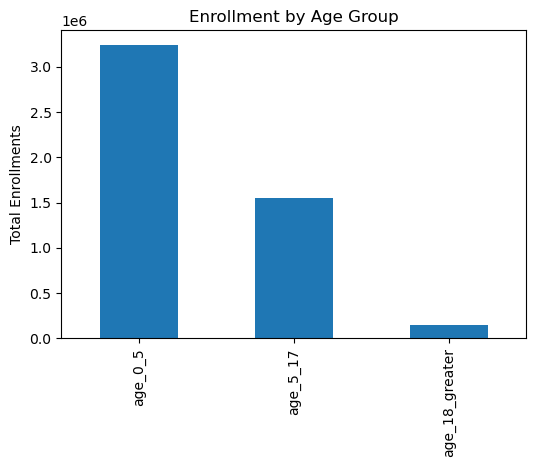

In [73]:
import matplotlib.pyplot as plt

age_totals = enrolment[['age_0_5','age_5_17','age_18_greater']].sum()

age_totals.plot(kind='bar', figsize=(6,4), title='Enrollment by Age Group')
plt.ylabel("Total Enrollments")
plt.show()


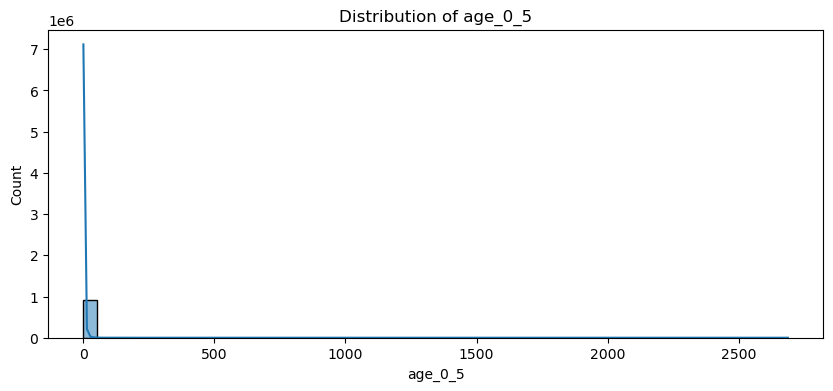

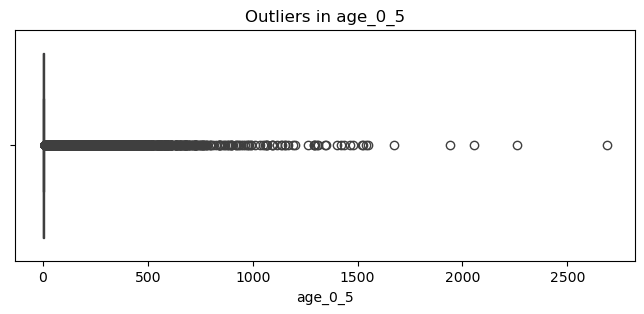

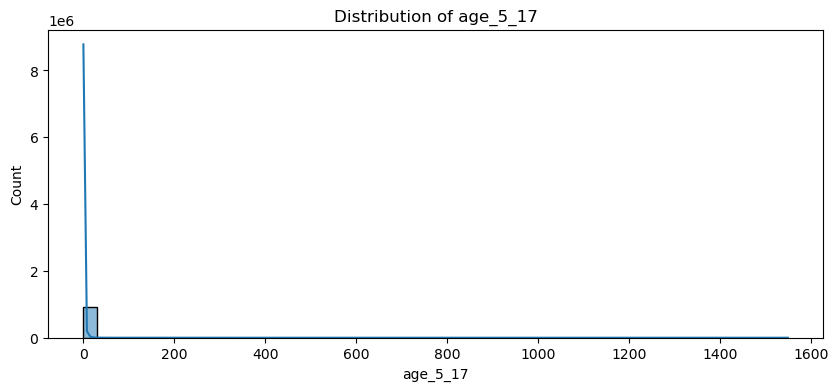

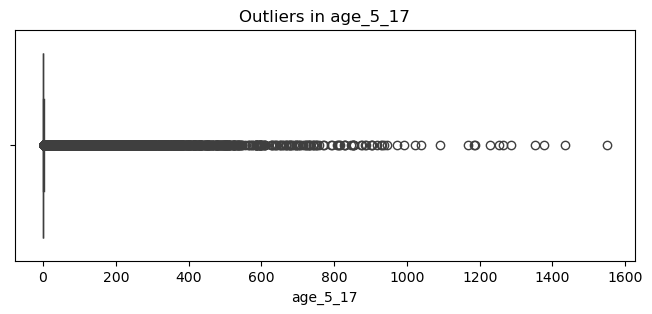

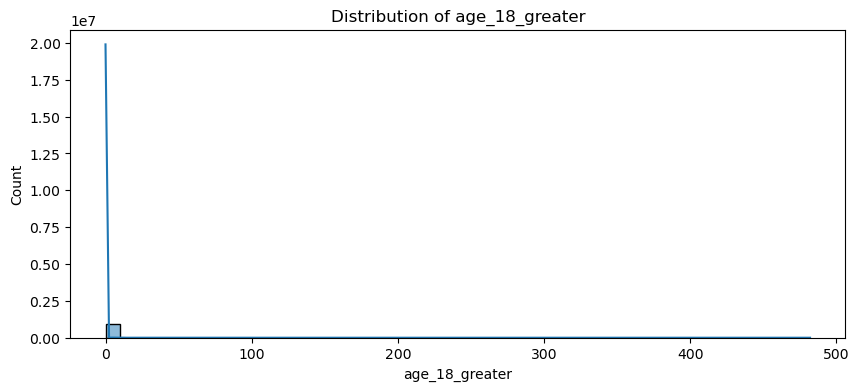

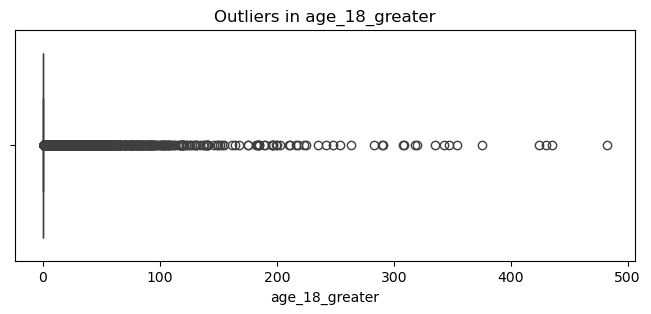

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['age_0_5','age_5_17','age_18_greater']:
    plt.figure(figsize=(10,4))
    sns.histplot(enrolment[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8,3))
    sns.boxplot(x=enrolment[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [75]:
state_share = enrolment.groupby('state_final')[['age_0_5','age_5_17','age_18_greater']].sum()
state_share['total'] = state_share.sum(axis=1)

state_share = state_share.sort_values('total', ascending=False)
state_share.head(10)


,age_0_5,age_5_17,age_18_greater,total
state_final,,,,
uttar pradesh,496479,453118,16876,966473
bihar,236146,296575,10151,542872
madhya pradesh,364058,113558,9484,487100
maharashtra,269424,80581,8017,358022
rajasthan,223731,111164,5456,340351
gujarat,179709,60978,14798,255485
west bengal,187209,58977,5598,251784
assam,141031,65972,22772,229775
tamil nadu,170509,35227,1232,206968


# State Level EDA (BIVARIATE)

In [76]:
state_age_ratio = state_share[['age_0_5','age_5_17','age_18_greater']].div(
    state_share['total'], axis=0
)

state_age_ratio.head(10)


,age_0_5,age_5_17,age_18_greater
state_final,,,
uttar pradesh,0.513702,0.468837,0.017461
bihar,0.434994,0.546307,0.018699
madhya pradesh,0.747399,0.233131,0.019470
maharashtra,0.752535,0.225073,0.022392
rajasthan,0.657354,0.326616,0.016031
gujarat,0.703403,0.238675,0.057921
west bengal,0.743530,0.234236,0.022233
assam,0.613779,0.287116,0.099106
tamil nadu,0.823842,0.170205,0.005953


# District Level EDA (TRIVARIATE)

In [77]:
district_total = enrolment.groupby(
    ['state_final','district_final']
)[['age_0_5','age_5_17','age_18_greater']].sum()

district_total['total'] = district_total.sum(axis=1)

district_total.sort_values('total', ascending=False).head(10)


,,age_0_5,age_5_17,age_18_greater,total
state_final,district_final,,,,
maharashtra,thane,29092,13629,967,43688
bihar,sitamarhi,20679,18856,2697,42232
uttar pradesh,bahraich,14674,22360,2304,39338
west bengal,murshidabad,31442,4383,86,35911
maharashtra,pune,24088,6536,1139,31763
rajasthan,jaipur,21436,8976,734,31146
karnataka,bengaluru,20441,6732,3807,30980
uttar pradesh,sitapur,16237,13869,748,30854
bihar,west champaran,11585,18070,783,30438


In [78]:
district_total['adult_ratio'] = district_total['age_18_greater'] / district_total['total']

district_total.sort_values('adult_ratio', ascending=False).head(10)


age_0_5  age_5_17  age_18_greater  \
state_final       district_final                                                
meghalaya         eastern west khasi hills        3       226             589   
mizoram           khawzawl                        5         7              24   
                  saitual                         2         3               7   
sikkim            namchi                          3         7              14   
meghalaya         ri bhoi                      1338      4598            3372   
                  east khasi hills             4258     14606            9948   
arunachal pradesh leparada                        0         2               1   
meghalaya         south garo hills              568      2427            1446   
punjab            kapurthala                   2067       446            1213   
meghalaya         south west khasi hills        789      1543            1114   

                                            total  adult_ratio  
state_final       district_final                                
meghalaya         eastern west khasi hills    818     0.720049  
mizoram           khawzawl                     36     0.666667  
                  saitual                      12     0.583333  
sikkim            namchi                       24     0.583333  
meghalaya         ri bhoi                    9308     0.362269  
                  east khasi hills          28812     0.345273  
arunachal pradesh leparada                      3     0.333333  
meghalaya         south garo hills           4441     0.325602  
punjab            kapurthala                 3726     0.325550  
meghalaya         south west khasi hills     3446     0.323273

# Temporal EDA 

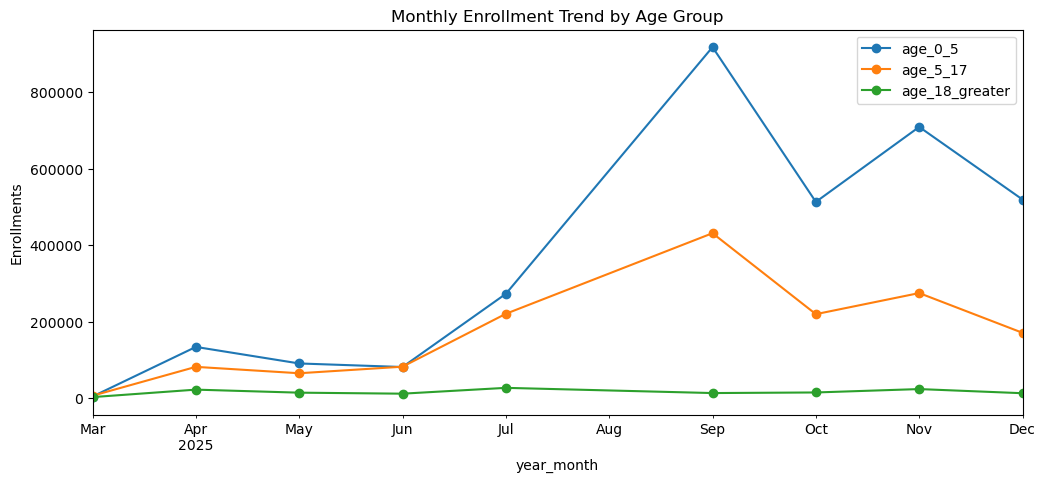

In [79]:
enrolment['year_month'] = enrolment['date'].dt.to_period('M')

monthly_enrol = enrolment.groupby('year_month')[['age_0_5','age_5_17','age_18_greater']].sum()

monthly_enrol.plot(figsize=(12,5), marker='o')
plt.title("Monthly Enrollment Trend by Age Group")
plt.ylabel("Enrollments")
plt.show()


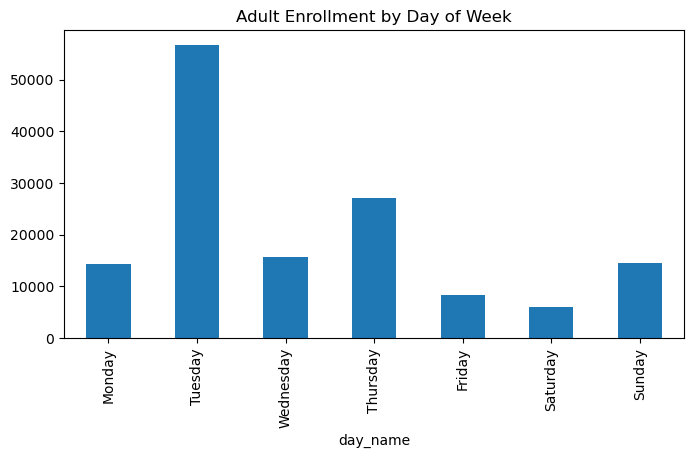

In [80]:
enrolment['day_name'] = enrolment['date'].dt.day_name()

dow = enrolment.groupby('day_name')['age_18_greater'].sum()
dow = dow.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

dow.plot(kind='bar', figsize=(8,4), title="Adult Enrollment by Day of Week")
plt.show()


# Anomaly Oriented EDA 

In [81]:
daily_district = enrolment.groupby(
    ['state_final','district_final','date']
)[['age_0_5','age_5_17','age_18_greater']].sum()

daily_district['total'] = daily_district.sum(axis=1)

stats = daily_district.groupby(
    ['state_final','district_final']
)['total'].agg(['mean','max'])

stats['spike_ratio'] = stats['max'] / (stats['mean'] + 1)

stats.sort_values('spike_ratio', ascending=False).head(10)


mean   max  spike_ratio
state_final   district_final                                 
uttar pradesh barabanki          32.986111  1784    52.492031
gujarat       ahmadabad          91.328767  4484    48.565579
              surendranagar      26.703704  1310    47.286096
              dohad             178.123288  8001    44.667559
delhi         new delhi          27.283333  1091    38.573954
gujarat       chhotaudepur       54.760000  1862    33.393113
delhi         shahdara           22.972973   799    33.329200
west bengal   alipurduar         48.328947  1631    33.063750
nagaland      mon                29.640000  1003    32.734987
meghalaya     north garo hills   46.500000  1495    31.473684

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date format
enrolment['date'] = pd.to_datetime(
    enrolment['date'], dayfirst=True, errors='coerce'
)

# Create year-month column
enrolment['year_month'] = enrolment['date'].dt.to_period('M')

# Create total enrollment column
enrolment['total_enrol'] = (
    enrolment['age_0_5'] +
    enrolment['age_5_17'] +
    enrolment['age_18_greater']
)


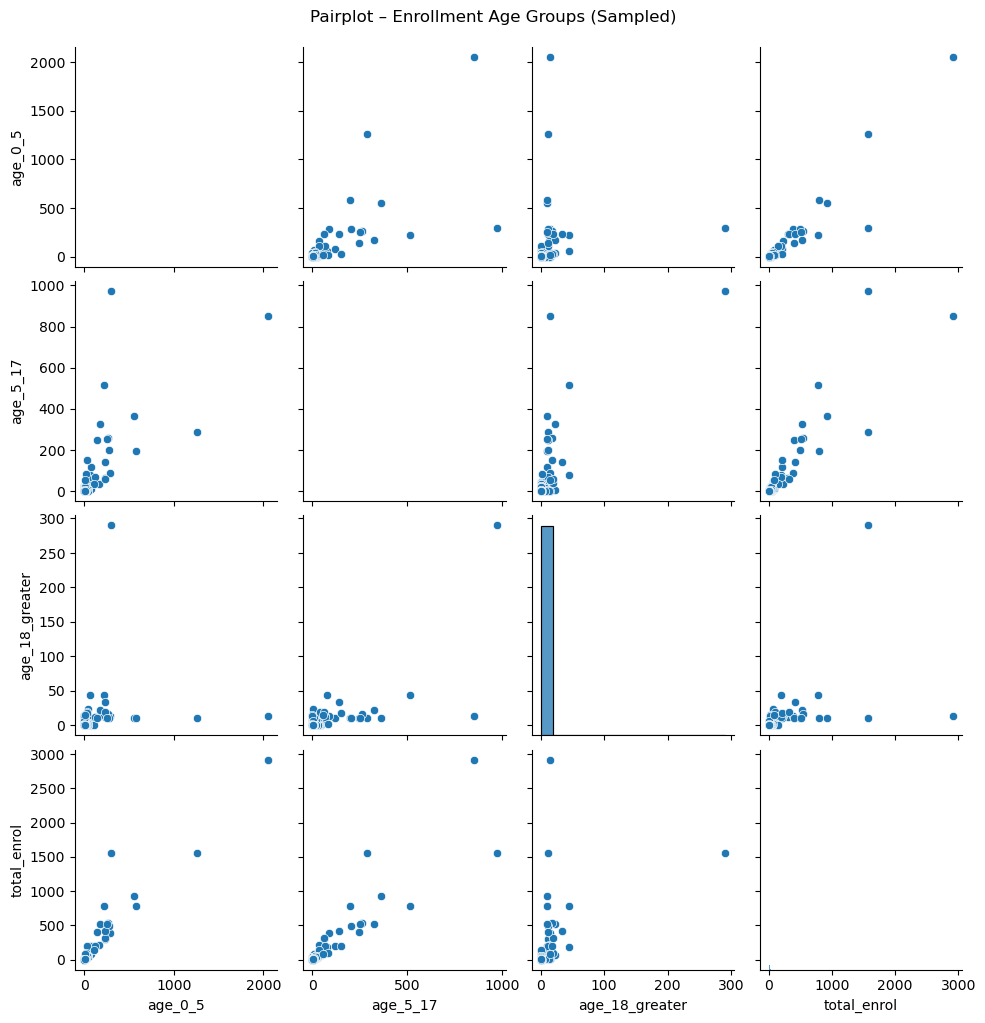

In [84]:
num_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrol']

# Sample to avoid memory issues
sample_df = enrolment[num_cols].sample(10000, random_state=42)

sns.pairplot(sample_df)
plt.suptitle("Pairplot – Enrollment Age Groups (Sampled)", y=1.02)
plt.show()


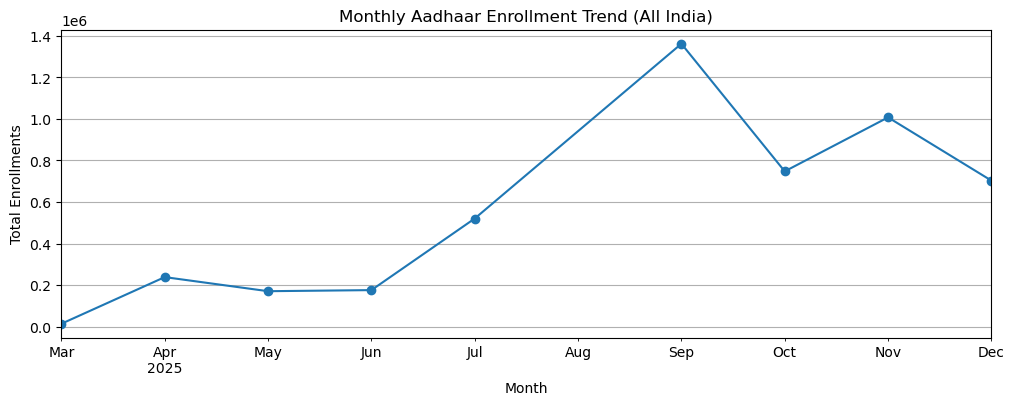

In [85]:
monthly_enrol = (
    enrolment
    .groupby('year_month')['total_enrol']
    .sum()
)

plt.figure(figsize=(12,4))
monthly_enrol.plot(marker='o')
plt.title("Monthly Aadhaar Enrollment Trend (All India)")
plt.xlabel("Month")
plt.ylabel("Total Enrollments")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


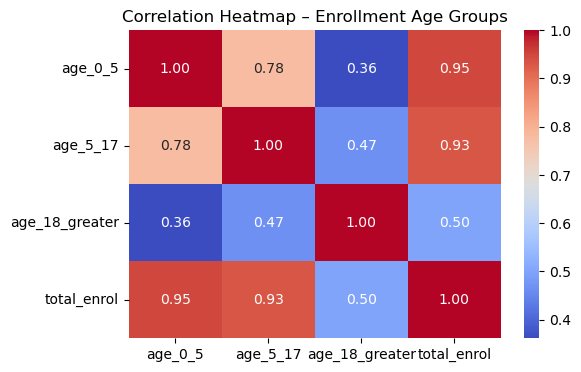

In [86]:
plt.figure(figsize=(6,4))
sns.heatmap(
    enrolment[num_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap – Enrollment Age Groups")
plt.show()


Enter State (e.g. maharashtra):  kerala
Enter District (e.g. pune):  ernakulam


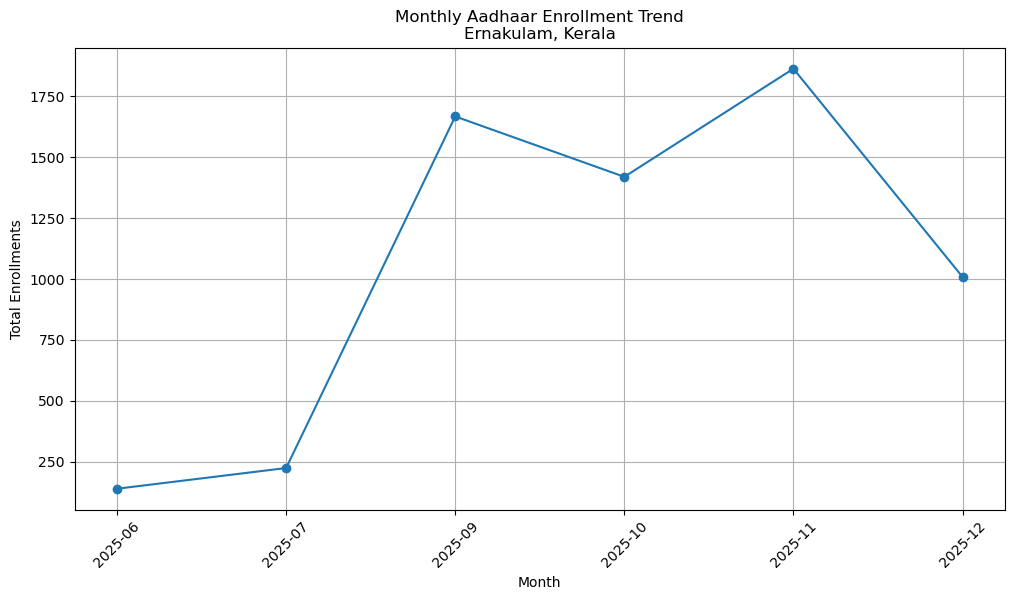

In [90]:
selected_state = input("Enter State (e.g. maharashtra): ").strip().lower()
selected_district = input("Enter District (e.g. pune): ").strip().lower()

filtered_df = enrolment[
    (enrolment['state_final'].str.lower() == selected_state) &
    (enrolment['district_final'].str.lower() == selected_district)
]

if filtered_df.empty:
    print("❌ No data found. Please check state/district spelling.")
else:
    monthly_data = (
        filtered_df
        .groupby('year_month')['total_enrol']
        .sum()
        .reset_index()
    )

    monthly_data['year_month'] = monthly_data['year_month'].astype(str)

    plt.figure(figsize=(12,6))
    plt.plot(
        monthly_data['year_month'],
        monthly_data['total_enrol'],
        marker='o'
    )

    plt.title(
        f"Monthly Aadhaar Enrollment Trend\n"
        f"{selected_district.title()}, {selected_state.title()}"
    )
    plt.xlabel("Month")
    plt.ylabel("Total Enrollments")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


In [94]:
enrol_monthly = enrolment.groupby('year_month')['total_enrol'].sum().reset_index()
enrol_monthly['dataset'] = 'Enrollment'

enrol_monthly.to_csv("enrol_monthly.csv", index=False)
